In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

## 7-qubit

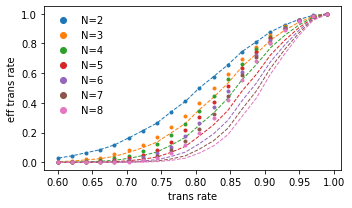

In [179]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,9)

plt.figure(1,figsize=(5,3))

bdy = True
Nl = 2
first = True
for i_rep in range(repeat):
    if bdy:
        fname = "data_7q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
    else:
        fname = "data_7q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
    if os.path.exists(fname):
        npz_file = np.load(fname)
        succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']

        if first :
            first = False
            succ_prob_2 = np.zeros(len(p_list))
            Ntot = 0

        succ_prob_2 += succ_prob*Nrep
        Ntot += Nrep
succ_prob_2 /= Ntot

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_7q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_7q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_avg /= Ntot
        plt.plot(1-p_list,succ_prob_avg**2,".", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))
        plt.plot(1-p_list,succ_prob_2**Nl,"--", color="C%d" % (i_L), linewidth=1)


f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")



x_list = np.linspace(0.6,1)
# plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## Effect of boundary condition

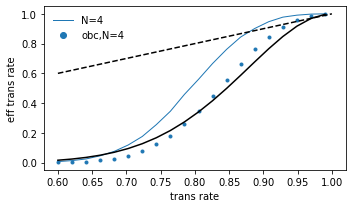

In [177]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(4,5)

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_7q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:
        succ_prob_avg /= Ntot
        plt.plot(1-p_list,succ_prob_avg**2,"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))

    first = True
    for i_rep in range(repeat):
        fname = "data_7q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg_obc = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg_obc += succ_prob*Nrep
            Ntot += Nrep
   
    if not first:
        succ_prob_avg_obc /= Ntot
        plt.plot(1-p_list,succ_prob_avg_obc**2,".", color="C%d" % (i_L), linewidth=1,label="obc,N=%d" % (Nl))

# f = lambda t: t**4 + 4*t**3 * (1-t) # ring 
f = lambda t: t**6 + 6*t**5 * (1-t)+ 6*t**4 * (1-t)**2 # [2,2] tree 
plt.plot(1-p_list,f(1-p_list)**4,"k-")

x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## 48-qubit ldpc

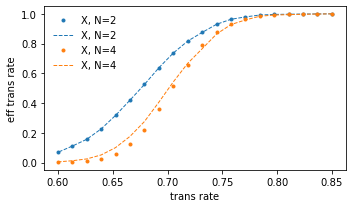

In [130]:
repeat = 24
Nl_list = np.arange(2,6,2)

plt.figure(1,figsize=(5,3))

Nl = 2
first = True
for i_rep in range(repeat):
    fname = "data_48q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)

    if os.path.exists(fname):
        npz_file = np.load(fname)
        succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

        if first :
            first = False
            succ_prob_X_2 = np.zeros(len(p_list))
            succ_prob_Z_2 = np.zeros(len(p_list))
            Ntot = 0

        succ_prob_X_2 += succ_prob_X*Nrep
        succ_prob_Z_2 += succ_prob_Z*Nrep
        Ntot += Nrep
            
succ_prob_X_2 /= Ntot
succ_prob_Z_2 /= Ntot

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros(len(p_list))
                succ_prob_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg,".", color="C%d" % (i_L), linewidth=1,label="X, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))
        plt.plot(1-p_list,succ_prob_X_2**(Nl/2),"--", color="C%d" % (i_L), linewidth=1,label="X, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))


# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")

x_list = np.linspace(0.6,0.85)
# plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

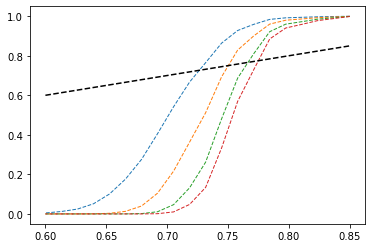

In [129]:
plt.plot(1-p_list,succ_prob_X_2**(2),"--", linewidth=1,label="X, N=%d" % (Nl))
plt.plot(1-p_list,succ_prob_X_2**(5),"--", linewidth=1,label="X, N=%d" % (Nl))
plt.plot(1-p_list,succ_prob_X_2**(10),"--", linewidth=1,label="X, N=%d" % (Nl))
plt.plot(1-p_list,succ_prob_X_2**(15),"--", linewidth=1,label="X, N=%d" % (Nl))
plt.plot(x_list,x_list,"k--")


## Effect of boundary condition

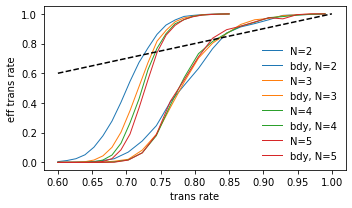

In [181]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,9)

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros(len(p_list))
                succ_prob_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            Ntot += Nrep
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg*succ_prob_Z_avg,"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))

    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg_obc = np.zeros(len(p_list))
                succ_prob_Z_avg_obc = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg_obc += succ_prob_X*Nrep
            succ_prob_Z_avg_obc += succ_prob_Z*Nrep
            Ntot += Nrep
            # plt.plot(1-p_list,succ_prob_X,".", color="C%d" % (i_L))

    if not first:
        succ_prob_X_avg_obc /= Ntot
        succ_prob_Z_avg_obc /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg_obc*succ_prob_Z_avg_obc,"-", color="C%d" % (i_L), linewidth=1,label="bdy, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg_obc,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))

x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()